<h1 id="structures">Структуры данных</h1>


- [Структуры данных](#structures)
  - [Массивы](#Массивы)
  - [Списки](#Списки)
    - [Односвязный список](#Односвязный-список)
      - [Реализация](#1.-Реализация)
    - [Двусвязный список](#Двусвязный-список)
      - [Реализация](#2.-Реализация)
  - [Стек](#Стек)
    - [Реализация](#3.-Реализация)
    - [Примеры](#1.-Примеры)
  - [Деревья](#Деревья)


## Массивы

- Константный доступ по индексу O(1)
- Непрерывный кусок памяти
- Фиксированный размер
  
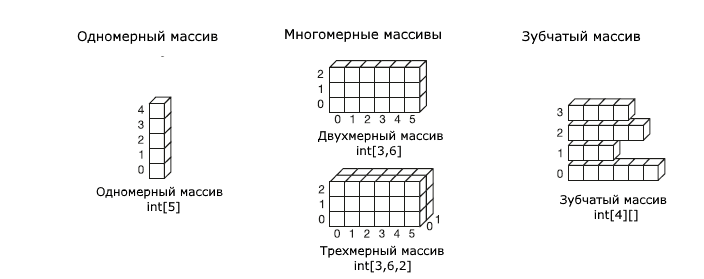

| | Вставка | Удаление |
| ----------- | ----------- | ----------- | 
| Начало | O(n) | O(n)|
| Конец | O(1) |  O(1)|
| Середина| O(1) | O(n)|

Реализацией массива в python является объект типа List.


## Списки

### Односвязный список

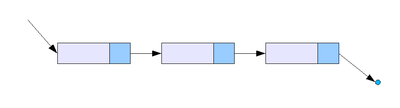

**Списки не обязаны располагаться последовательно в ячейках памяти**

Это динамическая структура данных, состоящая из узлов, содержащих данные и ссылки на следующий узел списка.

>Линейный однонаправленный список — это структура данных, состоящая из элементов одного типа, связанных между собой последовательно посредством указателей. Каждый элемент списка имеет указатель на следующий элемент. Последний элемент списка указывает на NULL. Элемент, на который нет указателя, является первым (головным) элементом списка. Здесь ссылка в каждом узле указывает на следующий узел в списке. В односвязном списке можно передвигаться только в сторону конца списка. Узнать адрес предыдущего элемента, опираясь на содержимое текущего узла, невозможно. 

| | Вставка | Удаление |
| ----------- | ----------- | ----------- | 
| Начало | O(1) | O(1)|
| Конец | O(1) |  O(n)|
| Середина| O(n) | O(n)|

### ! Замечание 

Можно реализовать вставку в середину за O(1) при прибегании к __особому методу__:

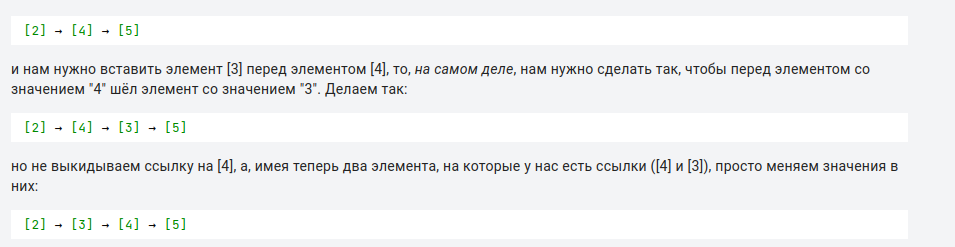

#### 1. Реализация

In [ ]:
class Node: 
    def __init__(self, data):
        self.data = data
        self.next = None
    def __repr__(self):
        return self.data

class LinkedList:
    def __init__(self, head:Node = None):
        self.head = None
    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)

### Двусвязный список

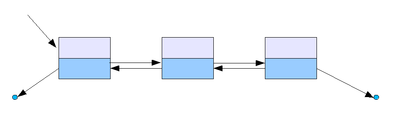

Здесь ссылки в каждом узле указывают на предыдущий и на последующий узел в списке. Как и односвязный список, двусвязный допускает только последовательный доступ к элементам, но при этом дает возможность перемещения в обе стороны. В этом списке проще производить удаление и перестановку элементов, так как легко доступны адреса тех элементов списка, указатели которых направлены на изменяемый элемент. 

| | Вставка | Удаление |
| ----------- | ----------- | ----------- | 
| Начало | O(1) | O(1)|
| Конец | O(1) |  O(1)|
| Середина| O(1) | O(1)|

### 2. Реализация

In [ ]:
class Node: 
    def __init__(self, data, previous: Node = None, next: Node = None):
        self.data = data
        self.previous = previous
        self.next = next
    def __repr__(self):
        return self.data

class doublyLinkedList:
    def __init__(self, head:Node = None):
        self.head = None
    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)

## Стек

>***Абстрактная структура данных*** -  это математическая модель для типов данных, где тип данных определяется поведением (семантикой) с точки зрения пользователя данных, а именно в терминах возможных значений, возможных операций над данными этого типа и поведения этих операций.

>___Стек___ — абстрактный тип данных, представляющий собой список элементов, организованных по принципу LIFO. Чаще всего принцип работы стека сравнивают со стопкой тарелок: чтобы взять вторую сверху, нужно снять верхнюю.

- Push(key)
- key Top()
- key Pop()
- bool Empty()


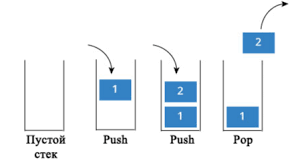

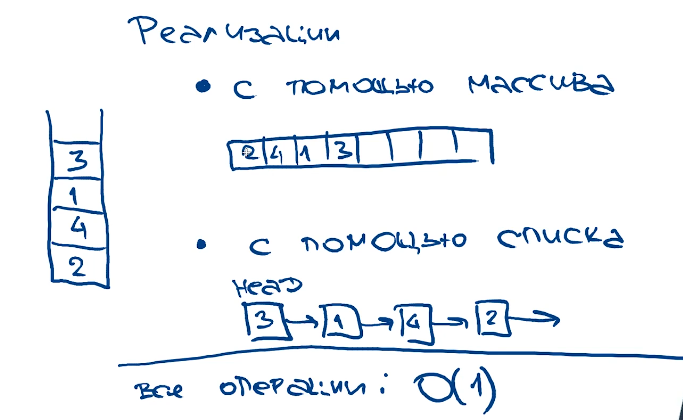

### 3. Реализация

In [31]:
class StackIterator:
    def __init__(self, stack):
        self.stack = stack

    def __iter__(self):
        return self

    def __next__(self):
        if not self.stack.empty():
            return self.stack.pop()
        else:
            raise StopIteration

class Stack:
    def __init__(self, lst: list = None):
        self.data = list(lst) if lst else []
        self.size = 0

    def push(self, key):
        self.data.append(key)
        self.size += 1

    def tail(self, key):
        return self.data[0]
        
    def top(self):
        return self.data[-1]

    def pop(self):
        self.size -= 1
        return self.data.pop(-1)

    def empty(self) -> bool:
        return not bool(self.data)

    def __str__(self):
        return str(self.data)

    def __iter__(self):
        return StackIterator(self)

In [32]:
class FixedStack:
    def __init__(self, capacity: int = 0, lst: list = None):
        self.data = list(lst) if lst else []
        self.size = len(self.data)
        self.capacity = capacity
        if self.size > capacity:
            raise IndexError("Stack overflowed")

    def push(self, key):
        if self.size == self.capacity:
            raise IndexError("Stack overflowed")
        self.data.append(key)
        self.size += 1
        
    def top(self):
        return self.data[-1]

    def pop(self):
        self.size -= 1
        return self.data.pop(-1)

    def empty(self) -> bool:
        return not bool(self.data)

    def __str__(self):
        return str(self.data)

    def __iter__(self):
        return StackIterator(self)


### Стек с поддержкой минимума

In [4]:
from math import inf
class Stack:
    def __init__(self):
        self.stack = []

    def __bool__(self):
        return bool(self.stack)

    def push(self, elem):
        if self.stack:
            self.stack.append((elem, min(elem, self.stack[-1][1])))
        else:
            self.stack.append((elem, elem))

    def pop(self):
        return self.stack.pop()[0]

    def get_min(self):
        if not self.stack:
            return inf
        return self.stack[-1][1]

### Стек с поддержкой максимума

In [4]:
from math import inf
class Stack:
    def __init__(self):
        self.stack = []

    def __bool__(self):
        return bool(self.stack)

    def push(self, elem):
        if self.stack:
            self.stack.append((elem, max(elem, self.stack[-1][1])))
        else:
            self.stack.append((elem, elem))

    def pop(self):
        return self.stack.pop()[0]

    def get_max(self):
        if not self.stack:
            return 0
        return self.stack[-1][1]

### Стек с поддержкой gcd, lcm, min, max

In [19]:
from math import gcd
import math
class Stack:
    def __init__(self):
        self.stack = []

    def __bool__(self):
        return bool(self.stack)

    def push(self, elem):
        if self.stack:
            self.stack.append((elem, max(elem, self.stack[-1][1]), min(elem, self.stack[-1][2]), 
                               gcd(elem, 
                                  self.stack[-1][3])))
        else:
            self.stack.append((elem, elem, elem, elem))

    def pop(self):
        return self.stack.pop()[0]
        
    def get_min(self):
        if not self.stack:
            return 0
        return self.stack[-1][2]
        
    def get_gcd(self):
        if not self.stack:
            return 0
        return self.stack[-1][3]

    def get_max(self):
        if not self.stack:
            return 0
        return self.stack[-1][1]

if __name__ == "__main__":
    s = Stack()
    s.push(1)
    s.push(100)
    s.push(50)
    print(s.ge)

1


#### 1. Примеры
##### Скобочная последовательность
Правильные:

    -()[]([])
    -((([]()[()])))[]
Неправильные:

    - ][
    - ([]]()
    - ([]

Вы разрабатываете текстовый редактор для
программистов и хотите реализовать проверку
корректности расстановки скобок. В коде могут
встречаться скобки []{}(). Из них скобки [,{
и ( считаются открывающими, а соответству-
ющими им закрывающими скобками являются ], } и ).


В случае, если скобки расставлены неправильно, редактор должен
также сообщить пользователю первое место, где обнаружена ошибка.
В первую очередь необходимо найти закрывающую скобку, для кото-
рой либо нет соответствующей открывающей (например, скобка ] в
строке “]()”), либо же она закрывает не соответствующую ей откры-
вающую скобку (пример: “()[}”). Если таких ошибок нет, необходи-
мо найти первую открывающую скобку, для которой нет соответству-
ющей закрывающей (пример: скобка ( в строке “{}([]”).
Помимо скобок, исходный код может содержать символы латин-
ского алфавита, цифры и знаки препинания.    

##### Псевдокод
```
IsBalanced(str):
Stack stack
for char in str:
    if char in {'c', '['}:
        stack.push(char)
    else:
        if stack.empty():
            return false
        top = stack.pop()
        if (top = "[" and char != "]") or 
            (top = "(" and char != ")"):
            return false
return stack.empty()
```

##### Python Code

In [81]:
def isBalanced(str):
    stack = Stack()
    bracket = {")":"(", "]":"[", "}":"{"}
    for idx, char in enumerate(str, start=1):
        if char in bracket.values():
            stack.push((idx, char))
        if char in bracket and (stack.empty() or bracket[char] != stack.pop()[1]):
            return idx
    return 0 if stack.empty() else stack.pop()[0]

if __name__ == "__main__":
    print(isBalanced("{*{{}"))

3


##### Стек с поддержкой максимума

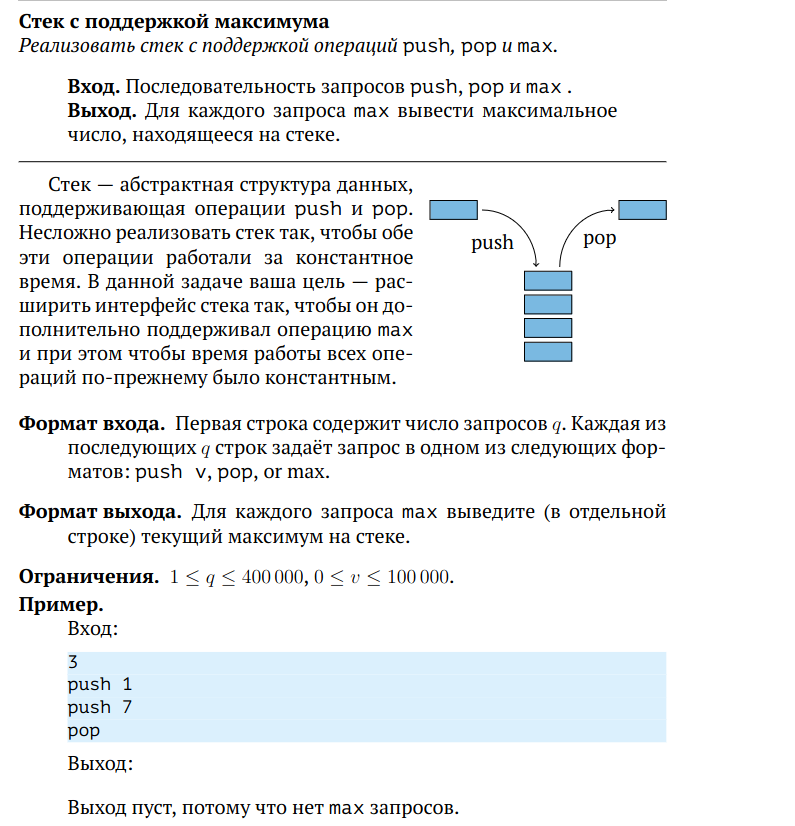


In [7]:
if __name__ == "__main__":
    s = Stack() # С поддержанием максимума
    inputs = int(input())
    commands = [input() for _ in range(inputs)]
    for command in commands:
        parts = command.split()
        action = parts[0]
        if action == "push":
            s.push(int(parts[1]))
        elif action == "pop":
            popped_item = s.pop()
        elif action == "max":
            print(s.get_max())

 10
 push 2
 push 3
 push 9
 push 7
 push 2
 max
 max
 max
 pop
 max


9
9
9
9


## Очередь

>__Очередь (англ. queue)__  — это структура данных, добавление и удаление элементов в которой происходит путём операций push и pop соответственно. Притом первым из очереди удаляется элемент, который был помещен туда первым, то есть в очереди реализуется принцип «первым вошел — первым вышел» __(англ. first-in, first-out — FIFO)__. У очереди имеется голова (англ. __head__) и хвост (англ. __tail__). Когда элемент ставится в очередь, он занимает место в её хвосте. Из очереди всегда выводится элемент, который находится в ее голове. Очередь поддерживает следующие операции: 

- *__empty__* — проверка очереди на наличие в ней элементов,
- *__push__* — (запись в очередь) — операция вставки нового элемента,
- *__pop__* (снятие с очереди) — операция удаления нового элемента,
- *__size__* — операция получения количества элементов в очереди.

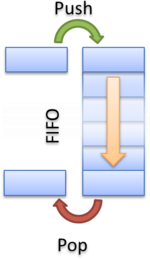



### Реализация очереди на массиве
Очередь, способную вместить не более n элементов, можно реализовать с помощью массива elements[0…n−1]. Она будет обладать следующими полями: 
*__head__* - голова очереди
*__tail__* - хвост очереди

```
boolean empty():
    return head==tail

push (x:T):
    if (size() != n):
        elements[tail]=x

pop():
    if (empty())
        return null
    x = elements[head]
    head += 1
    return x

int size():
    if head > tail:
        return n - head + tail
    else:
        return tail - head
```
| | Вставка | Удаление |
| ----------- | ----------- | ----------- | 
| | O(1) | O(1)|

__Плюсы:__

- проста в разработке,
- по сравнению с реализацией на списке есть незначительная экономия памяти.

__Минусы:__

- количество элементов в очереди ограничено размером массива (исправляется написанием функции расширения массива),
- при переполнении очереди требуется перевыделение памяти и копирование всех элементов в новый массив.

In [ ]:
class Queue:
    def __init__(self):
        self._head = 0
        self._tail = 0
        self._data = []

    def empty(self) -> bool:
        return self._head==self._tail

    def push(self, x):
        self._data.append(x)
        self._tail += 1

    def pop(self):
        value = self._data[self._head]
        self._head += 1
        return value

    def size(self) -> int:
        return self._tail - self._head


### Очередь на связных списках
Для данной реализации очереди необходимо создать список list и операции работы на созданном списке.

Реализация очереди на односвязном списке:

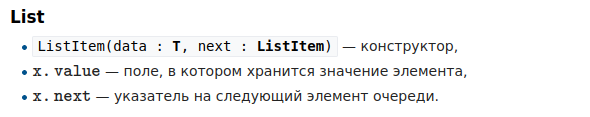

```
boolean empty():
    return head==tail

push (x:T):
    element = tail
    tail = ListItem(x, Null)
    if size == 0:
        heal = tail
    else:
        element.next = tail

pop():
    size--
    element = head
    head = head.next
    return element

```
| | Вставка | Удаление |
| ----------- | ----------- | ----------- | 
| | O(1) | O(1)|

__Плюсы:__

- каждая операция выполняется за время O(1).

__Минусы:__
- память фрагментируется гораздо сильнее и последовательная итерация по такой очереди может быть ощутимо медленнее, нежели итерация по очереди реализованной на массиве.

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

    def __repr__(self) -> str:
        return str(self.data)

    def __eq__(self, other):
        if self.data == other.data and self.next == other.next:
            return True
        return False


class Queue:
    def __init__(self):
        self._head = Node()
        self._tail = Node()
        self._size = 0

    def empty(self) -> bool:
        return self._head == self._tail

    def push(self, x):
        element = self._tail
        self._tail = Node(x)
        if self._size == 0:
            self._head = self._tail
            self._size += 1
        else:
            element.next = self._tail
            self._size += 1

    def pop(self):
        self._size -= 1
        element = self._head
        self._head = self._head.next
        return element

    def size(self) -> int:
        return self._size

### Очередь на двух стеках
Очередь можно реализовать на двух стеках leftStack и rightStack. Поступим следующим образом: leftStack будем использовать для операции push, rightStack для операции pop. При этом, если при попытке извлечения элемента из rightStack он оказался пустым, просто перенесем все элементы из leftStack в него (при этом элементы в rightStack получатся уже в обратном порядке, что нам и нужно для извлечения элементов, а leftStack станет пустым). 

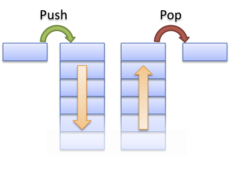

- *__pushLeft и pushRight__* — функции, реализующие операцию push для соответствующего стека,
- *__popLeft и popRight__* — аналогично операции pop.

```

push (x:T):
    pushLeft(x)

pop():
    if not rightStack.empty()
        return popRight() 
    else
        while not leftStack.empty()
          pushRight(popLeft())
        return popRight()

```
| | Вставка | Удаление |
| ----------- | ----------- | ----------- | 
| | O(1) | O(1) (невсегда)|

__Плюсы:__

- эту реализацию несложно модифицировать для получения минимума в текущей очереди за O(1).

__Минусы:__
- если leftStack не пуст, то операция pop может выполняться O(n) времени, в отличие от других реализаций, где pop всегда выполняется за O(1).

In [ ]:
class QueueWithTwoStacks:
    def __init__(self):
        self.in_stack = []
        self.out_stack = []

    def push(self, item):
        self.in_stack.append(item)

    def pop(self):
        if not self.out_stack:
            while self.in_stack:
                self.out_stack.append(self.in_stack.pop())
        if not self.out_stack:
            raise IndexError("Queue is empty")
        return self.out_stack.pop()

    def is_empty(self):
        return not self.in_stack and not self.out_stack

    def size(self):
        return len(self.in_stack) + len(self.out_stack)


#### Примеры

#### Задача
##### Вход: последовательность чисел $a_1, a_2, \dots, a_n$, число m
##### Выход: пройтись по последовательности окном размера m и вывести минимум в каждом из них
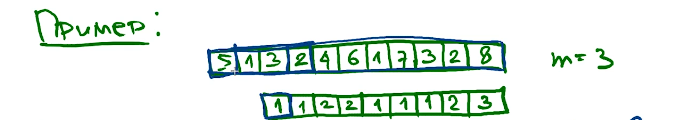

Решение в лоб занимает $O(n\cdot m)$.

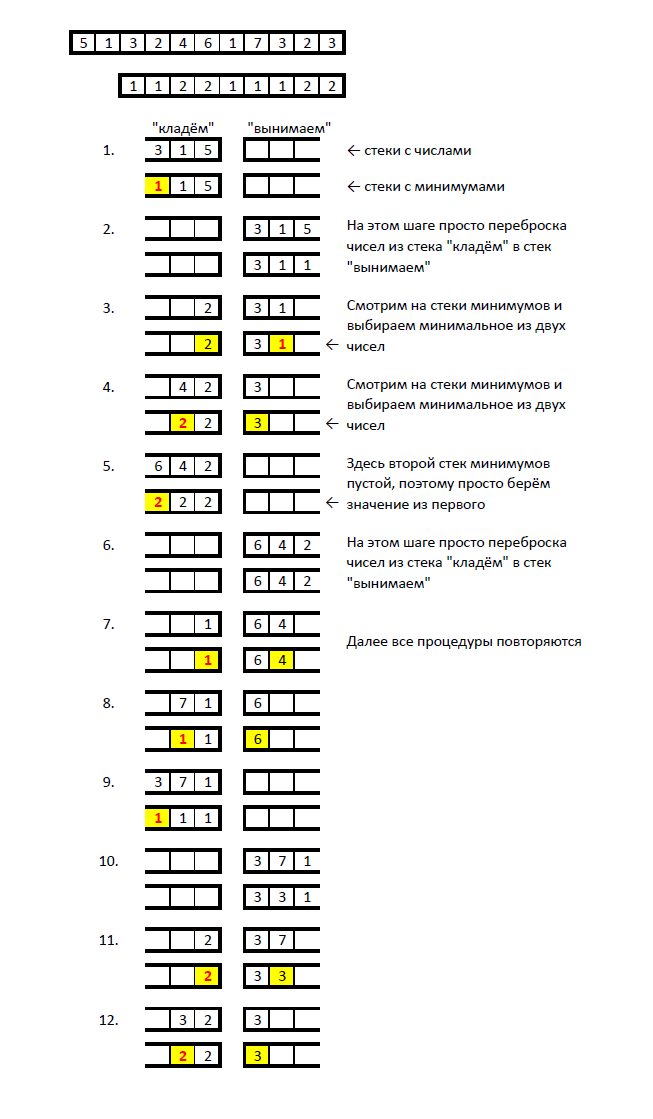

### Обработка сетевых пакетов

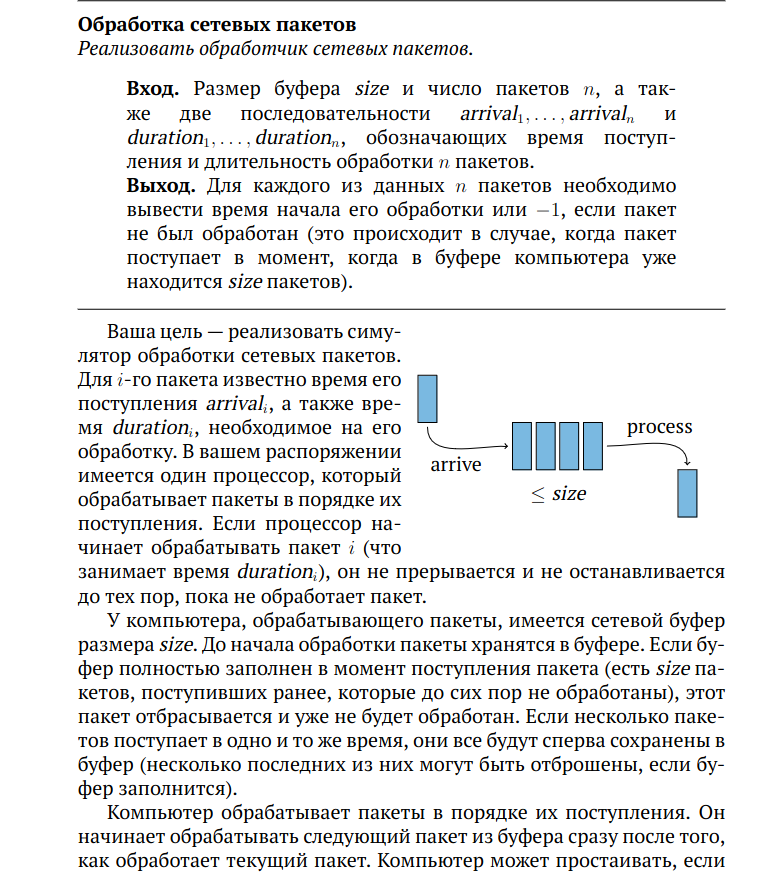

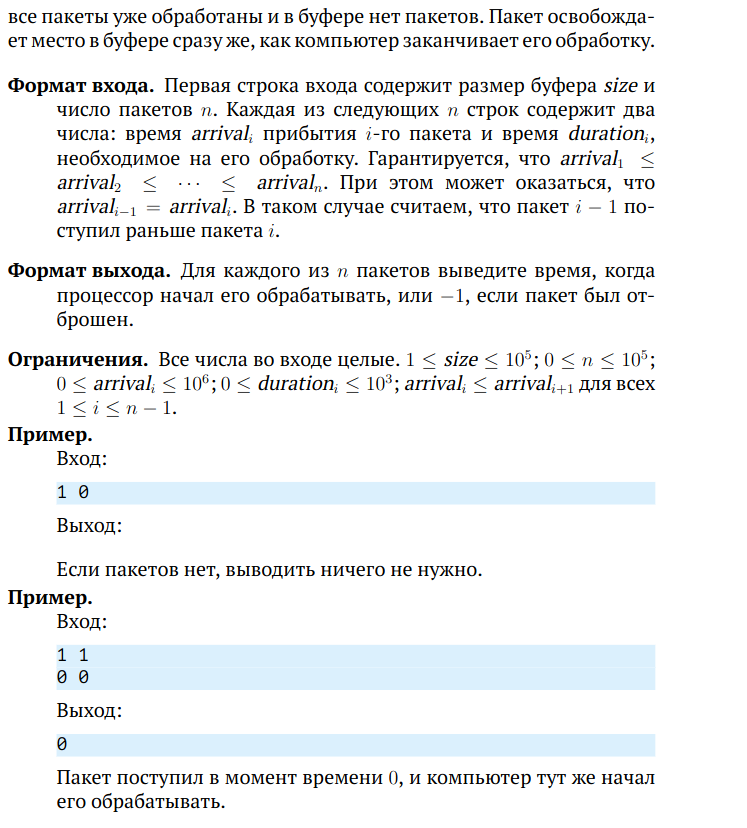

In [ ]:
import queue


def packetProcessing(size: int, n: int, packets: list):
    q = queue.Queue(size)
    next_available_time = 0
    for arrival, duration in packets:
        while not q.empty() and q.queue[0] <= arrival:
            q.get()
        if not q.full():
            start_time = max(arrival, next_available_time)
            print(start_time)
            next_available_time = start_time + duration
            q.put(next_available_time)
        else:
             print(-1)


if __name__ == "__main__":
    size, n = map(int, input().split()) 
    packets = [list(map(int, input().split())) for _ in range(n)]
    packetProcessing(size, n, packets)



## Кольцевая очередь

## Деревья

__Дерево__ - неориентированный граф, который с одной стороны является связным, а с другой не содержит циклов.

__Дерево__ — это, по сути, один из частных случаев графа. Древовидная модель может быть весьма эффективна в случае представления динамических данных, особенно тогда, когда у разработчика стоит цель быстрого поиска информации, в тех же базах данных, к примеру. Еще древом называют структуру данных, которая представляет собой совокупность элементов, а также отношений между этими элементами, что вместе образует иерархическую древовидную структуру.

## Дерево

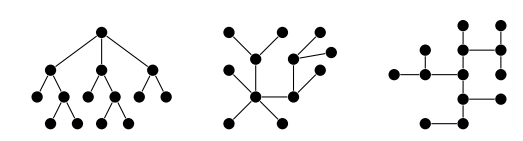

__Свойства__:
 - n вершин, n-1 ребро
 - ровно один путь для любых двух вершин

## Корневое дерево

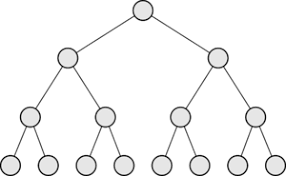!

С точки зрения теории графов __корневое дерево__ это просто обычное дерево, в котором одна из вершин помечена как __корень__.

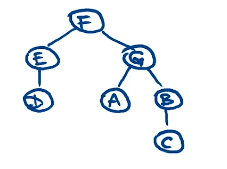

**Где:**
- **F - корень дерева** 
- **A, B - дети G**
- **E - родитель D**
- **A, B, C - потомки G**
- **F, G - предки B**


### Высота дерева
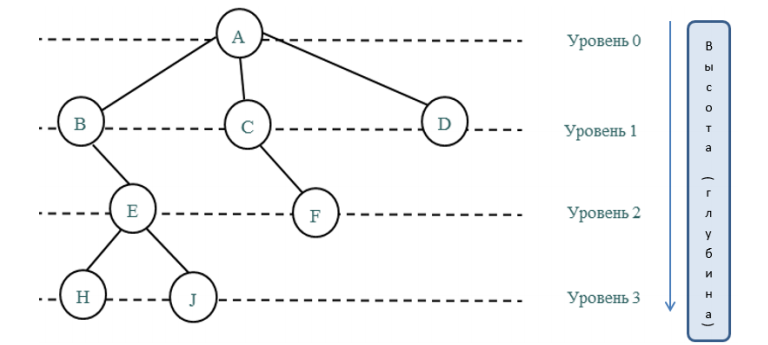

Также у дерева есть __высота (глубина)__. Она определяется числом уровней, на которых располагаются узлы дерева. Глубина пустого древа равняется нулю, а если  речь идет о дереве из одного корня, тогда единице. В данном случае на нулевом уровне может быть лишь одна вершина – корень, на 1-м – потомки корня, на 2-м – потомки потомков корня и т. д.

### Способы представления деревьев

#### 1. Список родителей

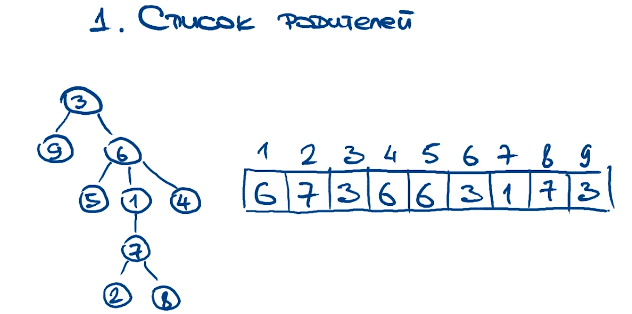

Для каждой вершины можно хранить указатель или ссылку на ее родителя.

Чтобы задать __дерево__, то для каждой вершины нужно задать ее __родителя__.

На рисунке выше можно понять это как:
 - Для значения 1 - 6 является родителем.
 - 2 для 7 родитель
 - 3 для 3 (сам для себя) **(Корень)**
 - 6 для 1 и так далее

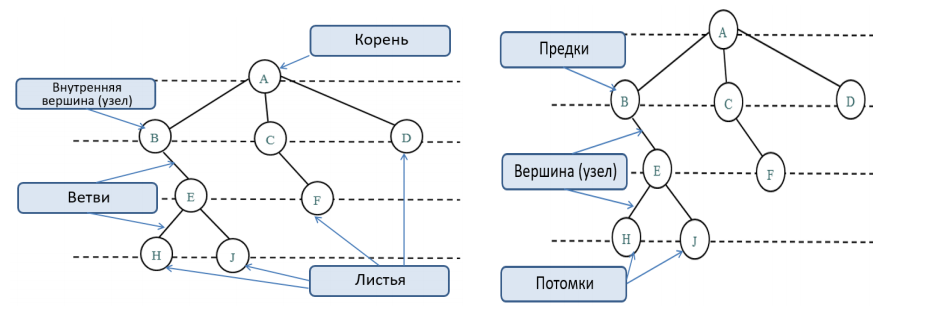



**Плюсы:**
- Удобство хранения и записи в файл
- Нахождение по вершине родителя

**Минусы:**
- Невозможно по вершине найти детей


#### 2. Списки детей 

##### Список смежности
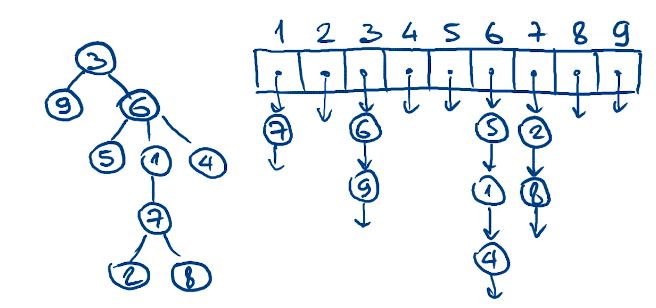

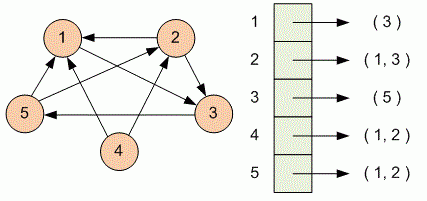

Хранится массив размера __n = 9__, но каждый элемент массива на самом деле список, хранящий всех детей текущей вершины.

#### 3. Вершина хранит данные, ссылку на родителя, ссылку на детей

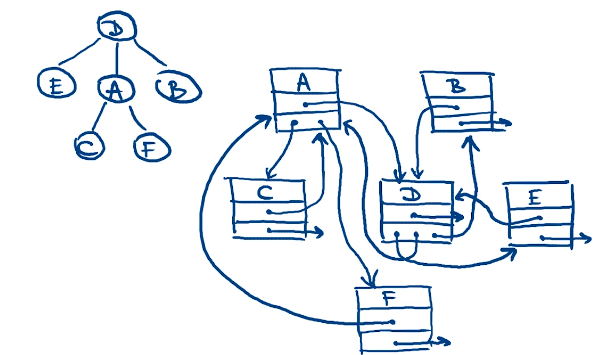

__Можно реализовать на связном списке__

### Бинарное дерево 

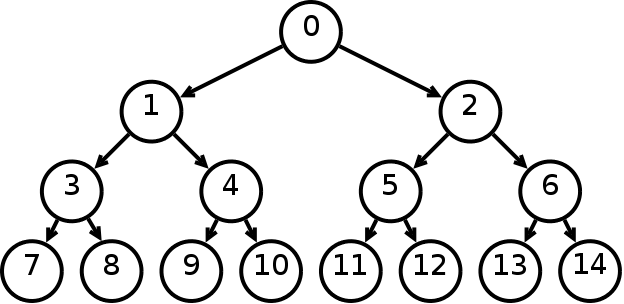

__Бинарное дерево__ — это иерархическая структура данных, в которой каждый узел имеет значение (оно же является в данном случае и ключом) и ссылки на левого и правого потомка. Узел, находящийся на самом верхнем уровне (не являющийся чьим либо потомком) называется корнем. Узлы, не имеющие потомков (оба потомка которых равны NULL) называются листьями.

### Бинарное дерево поиска

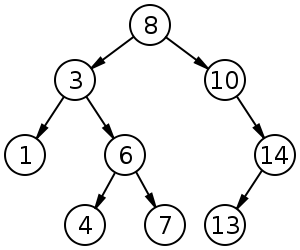

__Бинарное дерево поиска__ — это бинарное дерево, обладающее дополнительными свойствами: значение левого потомка меньше значения родителя, а значение правого потомка больше значения родителя для каждого узла дерева. То есть, данные в бинарном дереве поиска хранятся в отсортированном виде. При каждой операции вставки нового или удаления существующего узла отсортированный порядок дерева сохраняется. При поиске элемента сравнивается искомое значение с корнем. Если искомое больше корня, то поиск продолжается в правом потомке корня, если меньше, то в левом, если равно, то значение найдено и поиск прекращается.

__Сбалансированное бинарное дерево поиска__ — это бинарное дерево поиска с логарифмической высотой. Данное определение скорее идейное, чем строгое. Строгое определение оперирует разницей глубины самого глубокого и самого неглубокого листа (в AVL-деревьях) или отношением глубины самого глубокого и самого неглубокого листа (в красно-черных деревьях). В сбалансированном бинарном дереве поиска операции поиска, вставки и удаления выполняются за логарифмическое время (так как путь к любому листу от корня не более логарифма). В вырожденном случае несбалансированного бинарного дерева поиска, например, когда в пустое дерево вставлялась отсортированная последовательность, дерево превратится в линейный список, и операции поиска, вставки и удаления будут выполняться за линейное время. Поэтому балансировка дерева крайне важна. Технически балансировка осуществляется поворотами частей дерева при вставке нового элемента, если вставка данного элемента нарушила условие сбалансированности.


Для представления бинарного дерева будем использовать Node:
```
struct Node:
  T key                    // ключ узла
  Node left                // указатель на левого потомка
  Node right               // указатель на правого потомка
  Node parent              // указатель на предка
```

#### Поиск элемента
Для поиска элемента в бинарном дереве поиска можно воспользоваться следующей функцией, которая принимает в качестве параметров корень дерева и искомый ключ. Для каждого узла функция сравнивает значение его ключа с искомым ключом. Если ключи одинаковы, то функция возвращает текущий узел, в противном случае функция вызывается рекурсивно для левого или правого поддерева. Узлы, которые посещает функция образуют нисходящий путь от корня, так что время ее работы O(h), где h — высота дерева. 
```
Node search(x : Node, k : T):
   if x == null or k == x.key
      return x
   if k < x.key
      return search(x.left, k)
   else
      return search(x.right, k)
```

#### Поиск минимума и максимума
Чтобы найти минимальный элемент в бинарном дереве поиска, необходимо просто следовать указателям left от корня дерева, пока не встретится значение null. Если у вершины есть левое поддерево, то по свойству бинарного дерева поиска в нем хранятся все элементы с меньшим ключом. Если его нет, значит эта вершина и есть минимальная. Аналогично ищется и максимальный элемент. Для этого нужно следовать правым указателям. 
```
Node minimum(x : Node):
  if x.left == null
     return x
  return minimum(x.left)
```
```
Node maximum(x : Node):
  if x.right == null
     return x
  return maximum(x.right)
```

#### Поиск высоты дерева
Для нахождения высоты бинарного дерева мы начинаем с корня и рассматриваем его левое и правое поддеревья. Поскольку бинарное дерево имеет структуру, где каждый узел может иметь не более двух дочерних узлов, мы можем рассматривать рекурсивный метод.

Для каждого узла:

    1. Мы рекурсивно находим высоту его левого поддерева, переходя к левому узлу и продолжая этот процесс до тех пор, пока мы не достигнем листового узла (узла без дочерних узлов).
    2. Аналогично мы рекурсивно находим высоту его правого поддерева, переходя к правому узлу и продолжая этот процесс до тех пор, пока мы не достигнем листового узла.
    3. Мы выбираем большее из значений высот левого и правого поддеревьев и добавляем 1 (для текущего узла), так как высота узла определяется как максимальное количество уровней от этого узла до его самого далекого листового узла.
    4. Этот процесс повторяется для каждого узла в дереве, пока мы не достигнем всех листовых узлов, и наконец, мы находим максимальную высоту дерева.

Таким образом, мы рекурсивно идем от корня до листовых узлов, определяя высоту каждого поддерева и выбирая наибольшую из них.
```
function findHeight(root: Node):
    // Если узел пустой, то высота равна -1
    if node is null:
        return -1
    else:
        // Находим высоту левого поддерева
        leftHeight = findHeight(node.left)
        // Находим высоту правого поддерева
        rightHeight = findHeight(node.right)
        
        // Возвращаем большую из высот левого и правого поддеревьев,
        // увеличенную на 1 (для текущего узла)
        return max(leftHeight, rightHeight) + 1
```

### Реализация


In [47]:
class Node:
    def __init__(self, key, left= None, right = None, parent = None):
        self.key = key
        self.left = left
        self.right = right
        self.parent = parent

    def __repr__(self) -> str:
        left_key = self.left.key if self.left else "None"
        right_key = self.right.key if self.right else "None"
        parent_key = self.parent.key if self.parent else "None"
        return f"Node(key: {self.key}, left: {left_key}, right: {right_key}, parent: {parent_key})"
        
class BinaryTree:
    def __init__(self, root: Node = None):
        self.root = root
    
    def insert(self, key):
            if self.root is None:
                self.root = Node(key)
            else:
                self._insert_recursive(self.root, key)

    def _insert_recursive(self, node: Node, key):
            if hash(key) < hash(node.key):
                if node.left is None:
                    node.left = Node(key, parent=node)
                else:
                    self._insert_recursive(node.left, key)
            else:
                if node.right is None:
                    node.right = Node(key, parent=node)
                else:
                    self._insert_recursive(node.right, key)

    def search(self, key):
        return self._search_recursive(self.root, key) is not None

    def _search_recursive(self, node: Node, key):
        if node is None or hash(node.key) == hash(key):
            return node
        if hash(key) < hash(node.key):
            return self._search_recursive(node.left, key)
        return self._search_recursive(node.right, key)

    def minimum(self):
        if self.root is not None:
            return self._minimum_recursive(self.root)
        else:
            raise ValueError("Root is empty")

    def _minimum_recursive(self, node: Node):
        if node.left is None:
            return node
        return self._minimum_recursive(node.left)

    def maximum(self):
        if self.root is not None:
            return self._maximum_recursive(self.root)
        else:
            raise ValueError("Root is empty")

    def _maximum_recursive(self, node: Node):
        if node.right is None:
            return node
        return self._maximum_recursive(node.right)

    def height(self):
        return self._height_recursive(self.root)
    
    def _height_recursive(self, node: Node):
        if node is None: 
            return -1
        leftHeight = self._height_recursive(node.left)
        rightHeight = self._height_recursive(node.right)
        return max(leftHeight, rightHeight) + 1
            

#### Пример

##### Высота дерева

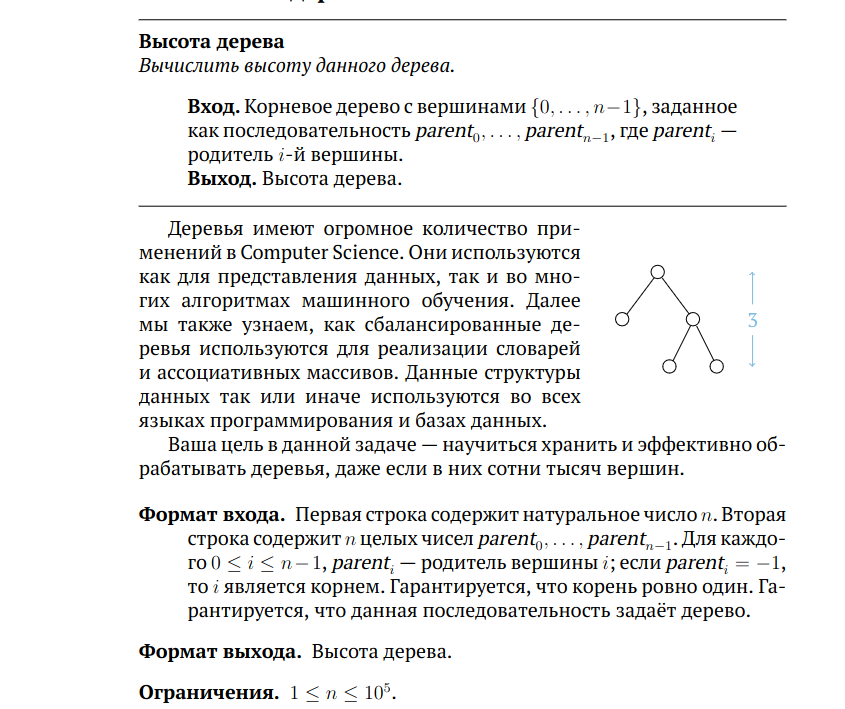

#### Решение

In [ ]:
n = int(input())
tree = [int(i) for i in input().split()]
heights = [0] * n
for leaf in range(n):
    node = leaf
    while node != -1:
        node = tree[node]
        heights[leaf] += 1
        if heights[node]:
            heights[leaf] += heights[node]
            break
print(max(heights))


## Массивы переменного размера

Динамический массив может изменять свой размер в зависимости от количества элементов в нём.
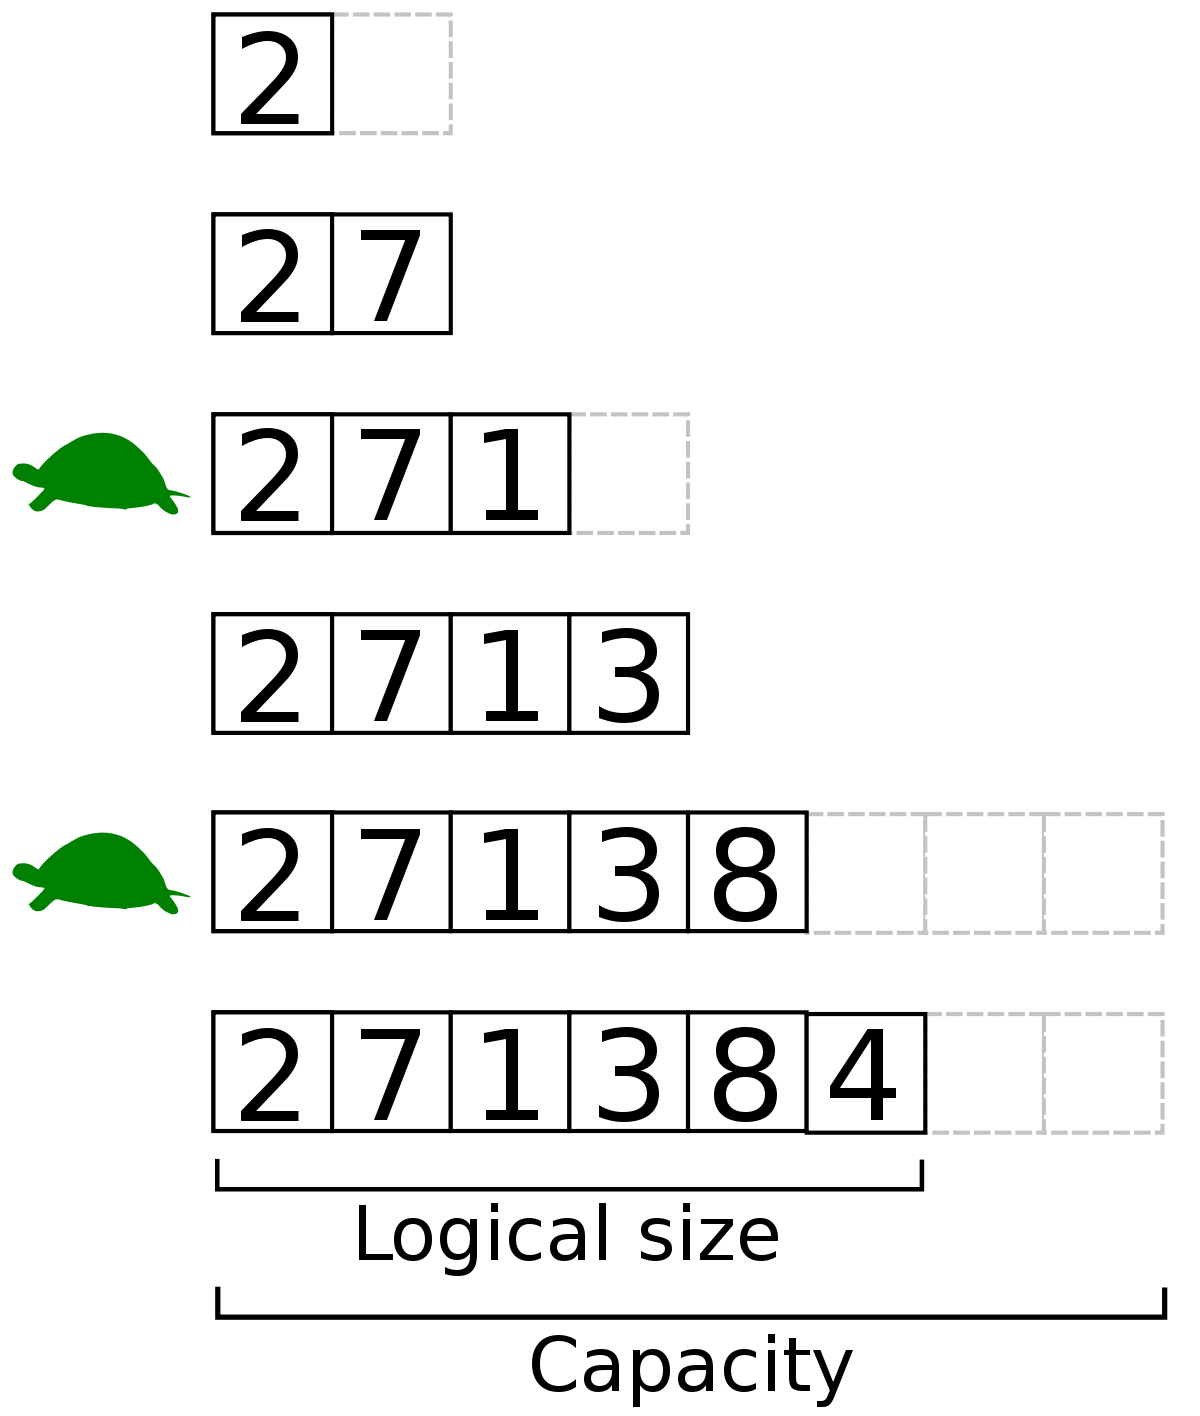

### Схемы перевыделения

#### Мультипликативная
$ l \implies \alpha l$

$1 + \alpha$ + $\alpha^2 + \dots + \alpha^{k} = \frac{\alpha^{k+1}-1}{\alpha-1} =  \Theta(n)$ 

$ \alpha^k \approx n$

Допустим l (длинна массива) = 1. При достижение максимального размера массива увеличим размер массива в $\alpha$ раз. В следующий раз при достижении максимального размера увеличим первоначальный размер l в $\alpha^2$ раз и так далее. Как можно видеть суммируя эти размеры, получается сумма геометрической прогрессии. С алгоритмической сложностью приблизительно $\Theta(n)$


__Мультипликативная схема более предпочтительна, чем аддитивная__

#### Аддитивная
$ l \implies l + \Delta$

$\Delta$ + $2\Delta + \dots + k \Delta = \Delta(1+2+\dots+k)=\Delta \cdot \frac{1}{2} \cdot k \cdot (k+1) = \Theta(n^2)$

$k \Delta \approx n$

Допустим l (длинна массива) = 0, тогда при попытке положить элемент произойдет увеличение размеров массива до $\Delta$. При попытке положить $\Delta +1$ элемент, снова перевыделяем память. Получается арифметическая прогрессия. С алгоритмической сложностью приблизительно $\Theta(n^2)$